## Coach Lab Linear Regression

### Objectives
*Put together a linear regression model <br>
*Understand the steps in modeling<br>
*Evaluate linear regression model


![caption](images/Model_Process_Part1.png)
![caption](images/Model_Process_Part2.png)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### For this lesson we will use the computer hardware dataset from https://www.mldata.io/dataset-details/computer_hardware/

In [2]:
comp = pd.read_csv('data/computer_hardware_dataset.csv')

### Project Question Formulation


What do we want to evaluate/explore/answer????

- which of these features are most significant in predicting PRP?
- which of these features is not linearly related to PRP?
- which features are related to one another?
- which computer model has the best PRP?
- which features interact with other features in predicting PRP?

In [3]:
comp.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [4]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
vendor_name    209 non-null object
model_name     209 non-null object
MYCT           209 non-null int64
MMIN           209 non-null int64
MMAX           209 non-null int64
CACH           209 non-null int64
CHMIN          209 non-null int64
CHMAX          209 non-null int64
PRP            209 non-null int64
ERP            209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [5]:
comp.describe().T

,count,mean,std,min,25%,50%,75%,max
MYCT,209.0,203.822967,260.262926,17.0,50.0,110.0,225.0,1500.0
MMIN,209.0,2867.980861,3878.742758,64.0,768.0,2000.0,4000.0,32000.0
MMAX,209.0,11796.153110,11726.564377,64.0,4000.0,8000.0,16000.0,64000.0
CACH,209.0,25.205742,40.628722,0.0,0.0,8.0,32.0,256.0
CHMIN,209.0,4.698565,6.816274,0.0,1.0,2.0,6.0,52.0
CHMAX,209.0,18.267943,25.997318,0.0,5.0,8.0,24.0,176.0
PRP,209.0,105.622010,160.830733,6.0,27.0,50.0,113.0,1150.0
ERP,209.0,99.330144,154.757102,15.0,28.0,45.0,101.0,1238.0


### Step 1 Train/test Split
#### Target is PRP

In [6]:
# create y and X as the target and the features
y = pd.DataFrame(comp['PRP'])
X = comp.drop(columns=['PRP'])

In [7]:
#split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .25)

In [8]:
#get shape of the training and test sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((156, 9), (156, 1), (53, 9), (53, 1))

In [9]:
y_train.head()

,PRP
29,27
19,120
135,54
139,40
66,17


### Step 2- Exploratory Data Analysis 

We will use only the training data for this part

#### As a first step in data cleaning lets look for missing values

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 29 to 102
Data columns (total 9 columns):
vendor_name    156 non-null object
model_name     156 non-null object
MYCT           156 non-null int64
MMIN           156 non-null int64
MMAX           156 non-null int64
CACH           156 non-null int64
CHMIN          156 non-null int64
CHMAX          156 non-null int64
ERP            156 non-null int64
dtypes: int64(7), object(2)
memory usage: 12.2+ KB


In [11]:
X_train.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,212.564103,2622.089744,11152.410256,23.250000,4.173077,16.570513,84.275641
std,275.241740,3067.076972,10007.800023,37.435644,5.817841,20.556488,99.350703
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,28.000000
50%,113.500000,2000.000000,8000.000000,8.000000,1.000000,8.000000,45.500000
75%,225.000000,3100.000000,16000.000000,32.000000,6.000000,24.000000,96.500000
max,1500.000000,16000.000000,64000.000000,256.000000,52.000000,128.000000,749.000000


In [12]:
X_train.isna().sum()

vendor_name    0
model_name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
ERP            0
dtype: int64

In [13]:
print(X_train.vendor_name.nunique())
print(X_train.model_name.nunique())

29
156


In [14]:
def drop_feature(data, features):
    return data.drop(columns= features)

In [15]:
#drop_columns = [model_name]
X_train = drop_feature(X_train, ["model_name", 'ERP'])

#### Next let's look at the distribution of our variables

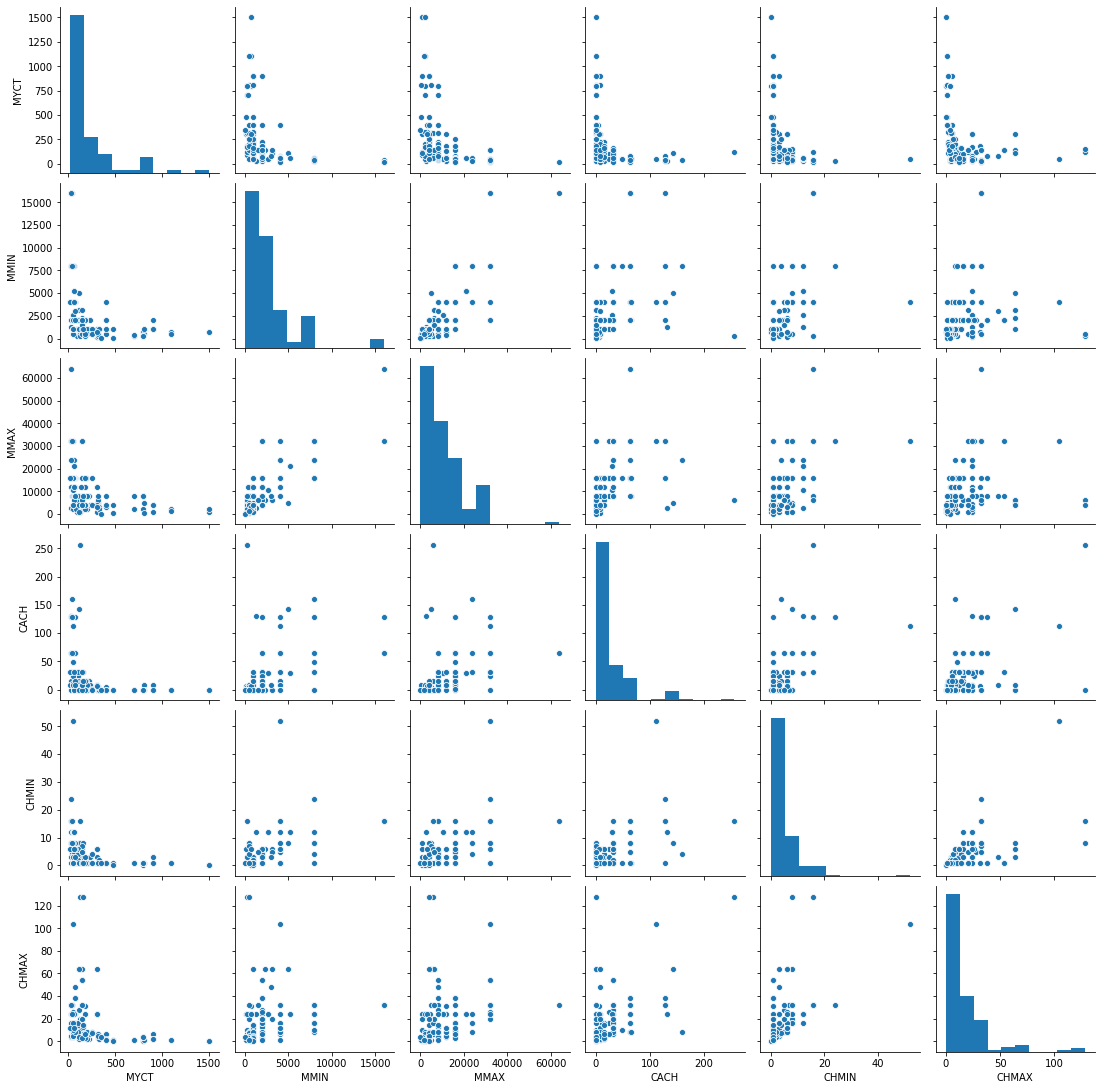

In [15]:
#create scatterplot matrix
sns.pairplot(X_train)

In [16]:
X_train.columns

Index(['vendor_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX'], dtype='object')

In [17]:
X_train_log = pd.concat([X_train.loc[:,'vendor_name'], X_train.loc[:,'CACH':'CHMAX'], X_train.loc[:, 'MYCT':'MMAX'].applymap(np.log).add_suffix('_log')], axis=1)

In [18]:
X_train_log.head()

,vendor_name,CACH,CHMIN,CHMAX,MYCT_log,MMIN_log,MMAX_log
29,c.r.d,4,1,6,5.768321,5.545177,8.517193
19,burroughs,142,8,64,4.700480,8.517193,8.517193
135,magnuson,24,6,16,3.912023,7.600902,9.680344
139,nas,2,1,5,4.744932,7.600902,8.294050
66,hp,0,3,10,4.499810,5.545177,6.907755


In [19]:
X_train_log.columns

Index(['vendor_name', 'CACH', 'CHMIN', 'CHMAX', 'MYCT_log', 'MMIN_log', 'MMAX_log'], dtype='object')

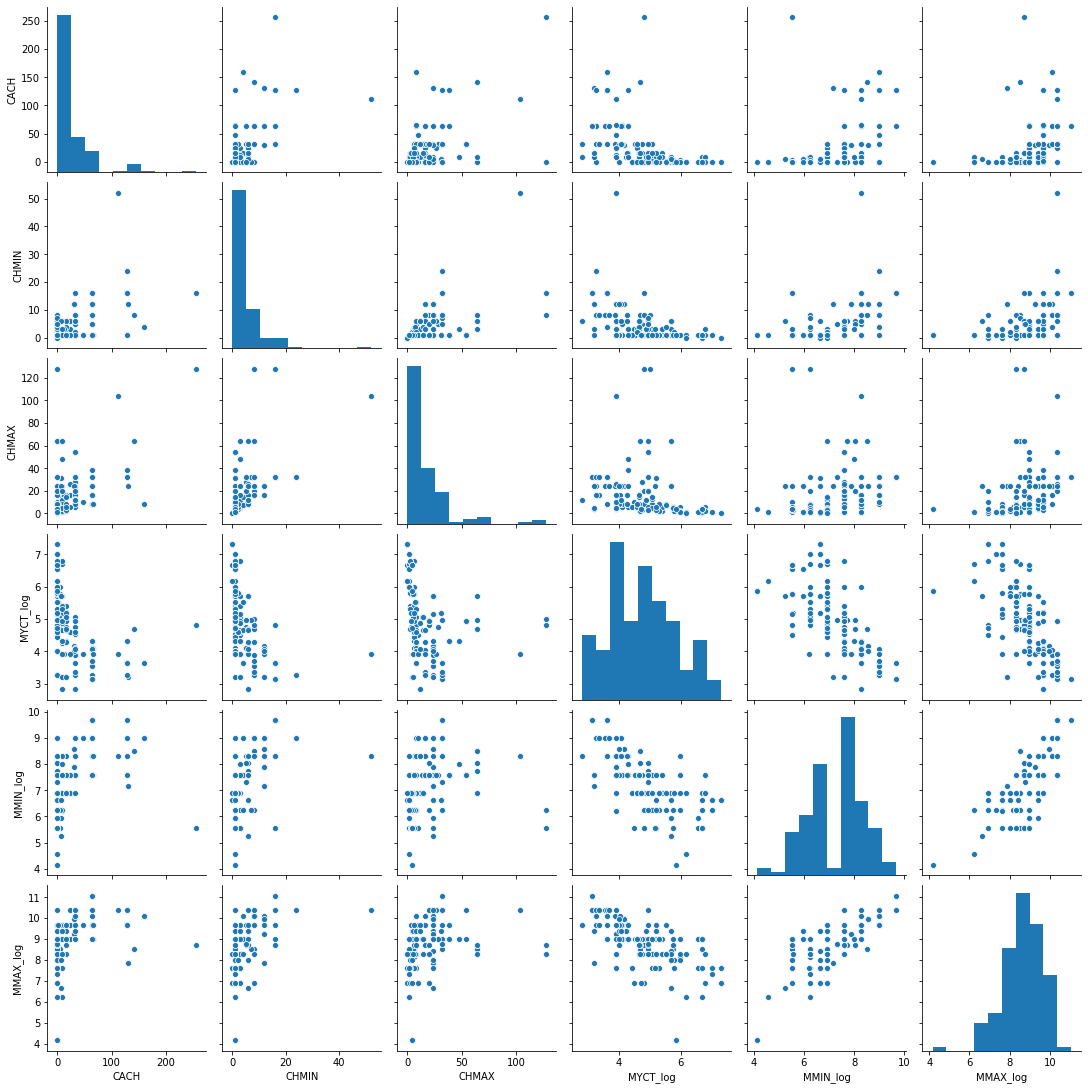

In [20]:
#create scatterplot matrix
sns.pairplot(X_train_log)

#### Next let's look at the distribution of our target

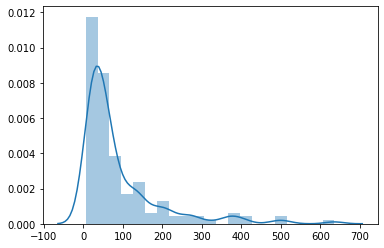

In [20]:
#histogram of y_train
sns.distplot(y_train)

#### Do we have any categorical variables we need to encode?

In [21]:
X_train_log.head()

,vendor_name,CACH,CHMIN,CHMAX,MYCT_log,MMIN_log,MMAX_log
29,c.r.d,4,1,6,5.768321,5.545177,8.517193
19,burroughs,142,8,64,4.700480,8.517193,8.517193
135,magnuson,24,6,16,3.912023,7.600902,9.680344
139,nas,2,1,5,4.744932,7.600902,8.294050
66,hp,0,3,10,4.499810,5.545177,6.907755


In [22]:
le = LabelEncoder()
X_train_log.vendor_name = le.fit_transform(X_train_log.vendor_name)

In [23]:
X_train_log.head()

,vendor_name,CACH,CHMIN,CHMAX,MYCT_log,MMIN_log,MMAX_log
29,6,4,1,6,5.768321,5.545177,8.517193
19,5,142,8,64,4.700480,8.517193,8.517193
135,19,24,6,16,3.912023,7.600902,9.680344
139,21,2,1,5,4.744932,7.600902,8.294050
66,16,0,3,10,4.499810,5.545177,6.907755


In [24]:
y_train.head()

,PRP
29,27
19,120
135,54
139,40
66,17


#### Next let's scale our data

Why do we do this?  What does it mean about the comparability of our variables?  What about interpretation of coefficients?

In [25]:
se = StandardScaler()
X_train_log.columns

Index(['vendor_name', 'CACH', 'CHMIN', 'CHMAX', 'MYCT_log', 'MMIN_log', 'MMAX_log'], dtype='object')

In [26]:
col_to_std = ['CACH', 'CHMIN', 'CHMAX', 'MYCT_log', 'MMIN_log', 'MMAX_log']
col_std = [col + "_std" for col in col_to_std]

In [27]:
X_train_std = pd.DataFrame(se.fit_transform(X_train_log.loc[:, "CACH": "MMAX_log"]), columns=col_std)

In [28]:
X_train_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
CACH_std        156 non-null float64
CHMIN_std       156 non-null float64
CHMAX_std       156 non-null float64
MYCT_log_std    156 non-null float64
MMIN_log_std    156 non-null float64
MMAX_log_std    156 non-null float64
dtypes: float64(6)
memory usage: 7.4 KB


In [29]:
X_train_log.loc[:,'vendor_name'].shape

(156,)

In [30]:
X_train_std = X_train_std.reset_index(drop=True)

In [31]:
X_train_std = X_train_std.join(X_train_log.loc[:,'vendor_name'].reset_index(drop=True))

### Step 4 - Messy Model

#### First let's use statsmodels

In [32]:
X_train_std.shape

(156, 7)

In [33]:
#Linear regression using statsmodels
X = sm.tools.add_constant(X_train_std)

ols = sm.OLS(y_train.reset_index(drop=True), X).fit()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [34]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PRP   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     53.20
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.57e-37
Time:                        00:46:15   Log-Likelihood:                -850.37
No. Observations:                 156   AIC:                             1717.
Df Residuals:                     148   BIC:                             1741.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          118.3423     10.656     11.106      0.000      97.285     139.399
CACH_std        31.9092      6.076      5.251      0.000      19.902      43.917
CHMIN_std       39.5246      6.483      6.096      0.000      26.712      52.337
CHMAX_std       -8.3896      6.024     -1.393      0.166     -20.293       3.514
MYCT_log_std     0.1482      6.917      0.021      0.983     -13.520      13.817
MMIN_log_std    25.1817      7.878      3.197      0.002       9.614      40.749
MMAX_log_std    20.9300      7.086      2.954      0.004       6.927      34.933
vendor_name     -1.8398      0.623     -2.951      0.004      -3.072      -0.608
==============================================================================
Omnibus:                       65.863   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.556
Skew:                           1.459   Prob(JB):                     1.23e-71
Kurtosis:                       9.459   Cond. No.                         39.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now let's use sklearn

In [35]:
#initialize a linear regression model in sklearn
linreg = LinearRegression()

In [36]:
#fit linear model to training data
linreg.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 5 - Model Evaluation

In [36]:
#Linear regression using statsmodels

In [37]:
#get summary statistics from statsmodels


In [38]:
#get r squared value from sklearn
linreg.score(X_train_std, y_train)

0.7155943216129277

In [39]:
#create formula for adjusted r squared
def adjusted_r_suared(r_squared, num_samples, num_regressors):
    return 1 - ((1-r_squared)*(num_samples - 1) / (num_samples - num_regressors - 1))

In [40]:
#calculate adjusted r squared
adjusted_r_suared(linreg.score(X_train_std, y_train), 156, 8)

0.7001164615646516

#### What does the r-squared value mean? What do the r-squared values tell us about the fit of our model?  What about adjusted r-squared?

#### Now let's look at predictions of relative performance to compare to actual relative performance

In [41]:
linreg_results_df = pd.DataFrame(linreg.predict(X_train_std), y_train).reset_index()

In [42]:
linreg_results_df.columns = ['Actual_Price', 'Predicted_Price']

In [43]:
linreg_results_df.head()

,Actual_Price,Predicted_Price
0,27,23.872148
1,120,237.142442
2,54,118.819524
3,40,38.396910
4,17,-19.192206


## Let's use regularization to see if that helps our model fit

In [44]:
#importing Lasso and Ridge models from sklearn
from sklearn.linear_model import Lasso, Ridge

### Lasso Regularizer

In [45]:
#conduct lasso regression on training data
LinLasso = Lasso()
LinLasso.fit(X_train_std, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
#Evaluation of lasso on training data
LinLasso.score(X_train_std, y_train)

0.7150239517762276

In [47]:
#examine coefficients from lasso
LinLasso.coef_

array([30.65311309, 37.78601872, -5.56280961, -0.        , 25.31272264,
       20.1768276 , -1.78409055])

### Ridge Regularizer

In [48]:
#conduct ridge regression on training data
ridge = Ridge()

In [49]:
#Evaluation of ridge on training data
ridge.fit(X_train_std, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
#examine coefficients from ridge
ridge.score(X_train_std, y_train)

0.7155769724724808

In [51]:
ridge.coef_

array([[31.69468859, 39.14190908, -8.03471318, -0.18969989, 25.04061886,
        20.82686476, -1.83548286]])

### Step 6 - Best Model Evaluation

In [55]:
#apply data cleaning process to test setX_test = drop_feature(X_test, ["model_name", 'ERP'])
X_test_log = pd.concat([X_test.loc[:,'vendor_name'], X_test.loc[:,'CACH':'CHMAX'], X_test.loc[:, 'MYCT':'MMAX'].applymap(np.log).add_suffix('_log')], axis=1)
X_test_log.vendor_name = le.fit_transform(X_test_log.vendor_name)
X_test_std = pd.DataFrame(se.fit_transform(X_test_log.loc[:, "CACH": "MMAX_log"]), columns=col_std)
X_test_std = X_test_std.join(X_test_log.loc[:,'vendor_name'].reset_index(drop=True))

In [56]:
X_test_std.head()

,CACH_std,CHMIN_std,CHMAX_std,MYCT_log_std,MMIN_log_std,MMAX_log_std,vendor_name
0,2.070114,0.642805,0.019786,-1.414080,-0.223437,-1.046022,4
1,-0.640712,-0.585901,-0.517978,0.638399,-0.453990,-0.646318,16
2,-0.640712,-0.362500,-0.464202,1.132682,-0.453990,-0.646318,9
3,1.345847,0.642805,4.106789,-1.234122,1.321462,1.972835,18
4,-0.640712,-0.585901,-0.517978,2.006719,-1.617375,0.008470,7


In [58]:
#run best model on test set
LinLasso.score(X_test_std, y_test)

0.3774675560927211

### Step 7 - Model Interpretation

What take-ways do we have?  Conclusions about our initial question?  Who would care?  Why do they care?